|  |  | 
|----------|----------|
| Name: | Elad Siman Tov | 
|  Course:   | ME 036049   |
|  Homerwork:   | No. 2   |


#### Problem 2.1 
To walk “downhill” on the loss function (equation 2.5), we measure its gradient with
respect to the parameters $\phi _0$ and $\phi _1$. Calculate expressions for the slopes $\partial L / \partial \phi _0$ and $\partial L / \partial \phi _1$
#### Solution
The loss funciton is given by $L[\phi]=\sum_{i=1}^{I} (\phi_0+\phi_1x_i-y_i)^2$. Therefore, the partial derivatives are given by:
$$∂L/∂ϕ_0 = \sum_{i=1}^{I} 2\cdot (\phi_0+\phi_1x_i-y_i)$$
$$∂L/∂ϕ_1 = \sum_{i=1}^{I} 2\cdot x_i \cdot (\phi_0+\phi_1x_i-y_i)$$

#### Problem 2.2 
Show that we can find the minimum of the loss function in closed form by setting the expression for the derivatives from problem 2.1 to zero and solving for $\phi _0$ and $\phi _1$. Note that
this works for linear regression but not for more complex models; this is why we use iterative model fitting methods like gradient descent (figure 2.4).

#### Solution
Setting the expressions to zero yields:

$$
0 = \sum_{i=1}^{I} 2\cdot (\phi_0+\phi_1x_i-y_i) = 
    \sum_{i=1}^{I} 2\cdot (\phi_0) + 
    \sum_{i=1}^{I} 2\cdot (\phi_1x_i) -
    \sum_{i=1}^{I} 2\cdot (y_i)=
    2I\phi_0+2\phi_1\sum_{i=1}^{I} x_i  - 2\sum_{i=1}^{I} y_i
$$
$$
\therefore \phi_0 = \frac { \sum_{i=1}^{I} y_i }{I}- \frac {\phi_1\sum_{i=1}^{I} x_i }{I} = \bar y - \phi_1\bar x

$$

Substitute $\phi_0$ and solving for $\phi_1$:
$$
0 = \sum_{i=1}^{I} x_i \cdot (\phi_0+\phi_1x_i-y_i)
\Rightarrow
\sum_{i=1}^{I}  x_i \cdot (\bar y - \phi_1\bar x+\phi_1x_i-y_i)=
\sum_{i=1}^{I}  (\bar y x_i - \phi_1\bar x x_i + \phi_1x_i^2-y_ix_i)

$$

$$
\therefore \phi_1 = \frac { \sum_{i=1}^{I} (x_iy_i - \bar y x_i )} {\sum_{i=1}^{I} (x_i^2 - \bar x x_i)}=
                    \frac { \sum_{i=1}^{I} x_iy_i - I\bar x\bar y} {\sum_{i=1}^{I} x_i^2 - I\bar x^2}
$$


It is well known that: 

$$ 
\sum_{i=1}^{n} (x_i - \bar{x})^2 = \sum_{i=1}^{n} x_i^2 - 2\bar{x} \sum_{i=1}^{n} x_i + n\bar{x}^2 = \sum_{i=1}^{n} x_i^2 - n\bar{x}^2 
$$
$$ 
\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) = \sum_{i=1}^{n} (x_iy_i) - 2n\bar{x}\bar y + n\bar{x}\bar y = \sum_{i=1}^{n} x_iy_i - n\bar{x}\bar y 

$$
So if we apply these reltions we will get:
$$
\therefore \phi_1 =  \frac { \sum_{i=1}^{I} (x_i - \bar x)(y_i - \bar y)} {\sum_{i=1}^{I} (x_i - \bar x)^2} 
$$
$$\phi_0 = \bar y - \phi_1\bar x$$


In [3]:
import numpy as np
from matplotlib import pyplot as plt

## Computation 



#### Problem 1 

beta_0 = 0.40000000000000036, beta_1 = 0.8857142857142857


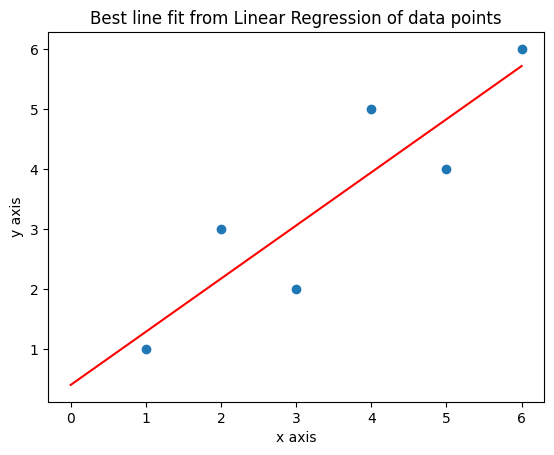

In [4]:
# Define the data points
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([1, 3, 2,5, 4, 6])
x_mu = np.average(x)
y_mu = np.average(y)

# Find optimal slope and intercept from analytical solution
beta_1 = sum((x - x_mu)*(y - y_mu)) / sum((x - x_mu)**2)
beta_0 = y_mu - beta_1 * x_mu

# plotting the data points and best line fit
x_opt = np.linspace(0, 6, 100)
y_opt = beta_0 + beta_1 * x_opt
plt.plot(x_opt, y_opt, "r-")
plt.scatter(x, y)
plt.title("Best line fit from Linear Regression of data points")
plt.xlabel("x axis")
plt.ylabel("y axis")
print(f'beta_0 = {beta_0}, beta_1 = {beta_1}')


#### Problem 2

*Note - I will create a function that will preform GD including the Lasso and Ridge Regularization options so that I can call it later on to compare different alphas and lambdas*


Given the learning rate 0.01,   the learned parameters are:
[0.37051804 0.89260067]
Cost history (first and last terms):
5.446193287037038 0.31436964795679523


Text(0, 0.5, 'Cost')

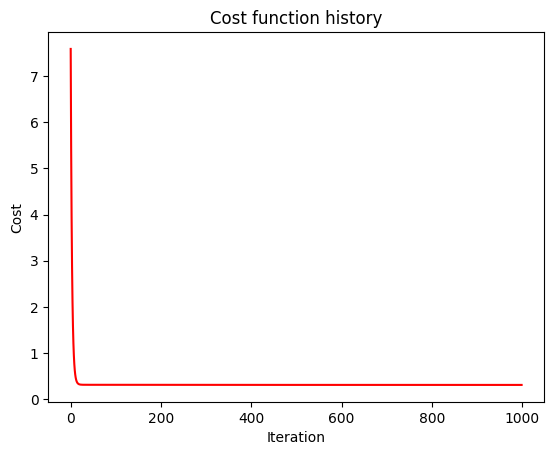

In [5]:
# define the function to call multiple times
def gradient_descent(x, y, learning_rate=0.01, num_iterations=1000, lamb = 0, regu_type=""):
    """    
    Parameters:
        X : numpy array
            shape (m, n), where m is the number of datapoints and n is the number of parameters needed to optimize.
            The first column of X should be all ones, representing the intercept term.
        y : numpy array
            The target values of shape (m,).
        learning_rate : float, optional
            The learning rate for gradient descent. Default is 0.01.
        num_iterations : int, optional
            The number of iterations for gradient descent. Default is 1000.
        lamb : float, optional
            Parameter to include regularization. Default is 0.
    
    Returns:
        betas : numpy array
            The learned parameters of shape (n,).
        cost_history : list
            A list containing the cost at each iteration.
    """
    # Reshape x and add intercept term to form X
    X = np.vstack((np.ones(len(x)), x)).T

    m = len(y)  # number of training examples
    n = X.shape[1]   # number of features
    
    betas = np.zeros(n)  # initialize parameters to zeros
    cost_history = []  # to store the cost at each iteration
    
    for _ in range(num_iterations):
        predictions = np.dot(X, betas)        
        error = predictions - y

        if regu_type == "Lasso":
            gradient = (1 / m) * np.dot(X.T, error) + lamb * np.ones(n)     
            betas -= learning_rate * gradient 
            cost = (1 / (2 * m)) * np.sum(np.square(error)) + lamb * sum(np.abs(betas))

        elif regu_type == "Ridge":
            
            gradient = (1 / m) * np.dot(X.T, error) + 2*lamb*betas
            betas -= learning_rate * gradient        
            cost = (1 / (2 * m)) * np.sum(np.square(error)) + lamb * sum(np.square(betas))

        else:
            gradient = (1 / m) * np.dot(X.T, error)
            betas -= learning_rate * gradient                
            cost = (1 / (2 * m)) * np.sum(np.square(error))

        cost_history.append(cost)

    # Give some output
    print(f"\nGiven the learning rate {learning_rate}, {bool(lamb)*regu_type} {bool(lamb)*str(lamb)} the learned parameters are:")
    print(betas)
    print("Cost history (first and last terms):")
    print(cost_history[1], cost_history[-1])
    return betas, cost_history

# Set the data points
x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([1, 3, 2, 5, 4, 6])

# Applying gradient descent in multiple scenarios
betas, cost_history = gradient_descent(x, y, learning_rate=0.01, lamb=0, num_iterations=1000, regu_type="Ridge")

# Plot the cost history 
plt.plot(cost_history, "r-", label="Cost")

plt.title("Cost function history")
plt.xlabel("Iteration")
plt.ylabel("Cost")



Given the learning rate 0.01,   the learned parameters are:
[0.37051804 0.89260067]
Cost history (first and last terms):
5.446193287037038 0.31436964795679523

Given the learning rate 0.0001,   the learned parameters are:
[0.17638735 0.74019978]
Cost history (first and last terms):
7.560124119328703 0.6146959773443219

Given the learning rate 0.1,   the learned parameters are:
[0.4        0.88571429]
Cost history (first and last terms):
2.9193287037037035 0.3142857142857143


Text(0, 0.5, 'y axis')

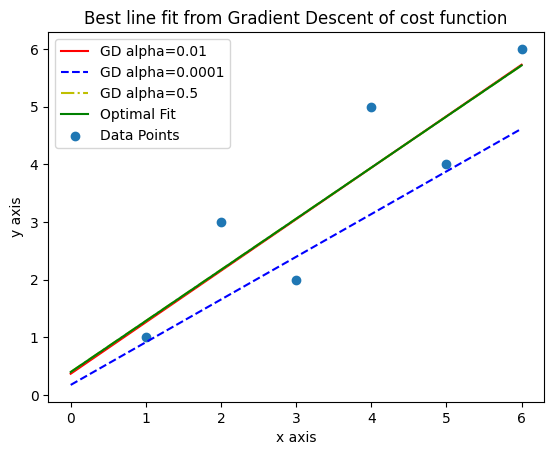

In [8]:

# Plot the Best line fit and the GD fit for different alphas
betas, _ = gradient_descent(x, y, learning_rate=0.01)
x_pred = np.linspace(0, 6, 100)
y_pred = betas[0] + betas[1] * x_pred
plt.plot(x_pred, y_pred, "r", label="GD alpha=0.01")

betas, _ = gradient_descent(x, y, learning_rate=0.0001)
y_pred = betas[0] + betas[1] * x_pred
plt.plot(x_pred, y_pred, "b--", label="GD alpha=0.0001")

betas, _ = gradient_descent(x, y, learning_rate=0.1)
y_pred = betas[0] + betas[1] * x_pred
plt.plot(x_pred, y_pred, "y-.", label="GD alpha=0.5")

plt.plot(x_opt, y_opt, "g-", label="Optimal Fit")
plt.scatter(x, y, label="Data Points")
plt.legend()
plt.title("Best line fit from Gradient Descent of cost function")
plt.xlabel("x axis")
plt.ylabel("y axis")



We can see that the GD learned the optimal beta parameters with some error corresponding to the residual loss. 
The learning rate can be too small for the number of iterations or too large for the gradients. If the learning rate is too small it will require much more iterations to converge

### Problem 3 - *Regularization*



Given the learning rate 0.01, Lasso 0.1 the learned parameters are:
[0.03464058 0.96333724]
Cost history (first and last terms):
5.494975259259259 0.42725387984312657

Given the learning rate 0.01, Ridge 0.1 the learned parameters are:
[0.29966887 0.89704955]
Cost history (first and last terms):
5.454041553856698 0.405762840767014

Given the learning rate 0.01, Lasso 0.01 the learned parameters are:
[0.33693029 0.89967432]
Cost history (first and last terms):
5.4511043567592585 0.327037430941997

Given the learning rate 0.01, Ridge 0.01 the learned parameters are:
[0.35989504 0.89385837]
Cost history (first and last terms):
5.446979651540017 0.3237351381978872

Given the learning rate 0.01, Lasso 0.5 the learned parameters are:
[-1.30886927  1.24628356]
Cost history (first and last terms):
5.682798148148147 1.8811356758832285

Given the learning rate 0.01, Ridge 0.5 the learned parameters are:
[0.23236495 0.86721996]
Cost history (first and last terms):
5.4850937936612665 0.7448132780

Text(0, 0.5, 'y axis')

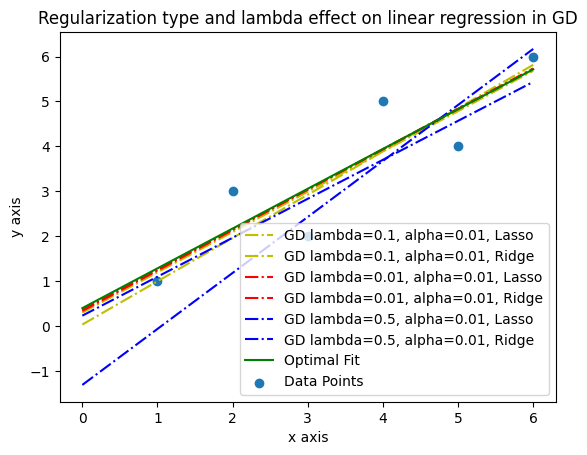

In [9]:
# Call GD function and insert different values for different lambdas
betas, _ = gradient_descent(x, y, lamb=0.1, regu_type="Lasso")
y_pred = betas[0] + betas[1] * x_pred
plt.plot(x_pred, y_pred, "y-.", label="GD lambda=0.1, alpha=0.01, Lasso")

betas, _ = gradient_descent(x, y, lamb=0.1, regu_type="Ridge")
y_pred = betas[0] + betas[1] * x_pred
plt.plot(x_pred, y_pred, "y-.", label="GD lambda=0.1, alpha=0.01, Ridge")

betas, _ = gradient_descent(x, y, lamb=0.01, regu_type="Lasso")
y_pred = betas[0] + betas[1] * x_pred
plt.plot(x_pred, y_pred, "r-.", label="GD lambda=0.01, alpha=0.01, Lasso")

betas, _ = gradient_descent(x, y, lamb=0.01, regu_type="Ridge")
y_pred = betas[0] + betas[1] * x_pred
plt.plot(x_pred, y_pred, "r-.", label="GD lambda=0.01, alpha=0.01, Ridge")

betas, _ = gradient_descent(x, y, lamb=0.5, regu_type="Lasso")
y_pred = betas[0] + betas[1] * x_pred
plt.plot(x_pred, y_pred, "b-.", label="GD lambda=0.5, alpha=0.01, Lasso")

betas, _ = gradient_descent(x, y, lamb=0.5, regu_type="Ridge")
y_pred = betas[0] + betas[1] * x_pred
plt.plot(x_pred, y_pred, "b-.", label="GD lambda=0.5, alpha=0.01, Ridge")

plt.plot(x_opt, y_opt, "g-", label="Optimal Fit")
plt.scatter(x, y, label="Data Points")
plt.title("Regularization type and lambda effect on linear regression in GD")
plt.legend()
plt.xlabel("x axis")
plt.ylabel("y axis")


#### Problem 4

The calculation is simply by matrix multiplication as follows:
$$h=\sigma(W_1X+B_1)$$
$$o_1=\sigma(hW_2 + B_2) = \sigma(W_2\sigma(XW_1+B_1)+B_2)=\\=\sigma(\begin{bmatrix} 0.7 & 0.8 \end{bmatrix} \cdot \sigma \left ( \begin{bmatrix} 0.3 & 0.7 \end{bmatrix} \cdot \begin{bmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \end{bmatrix} + \begin{bmatrix} 0.5 & 0.6 \end{bmatrix} \right) + \begin{bmatrix} 0.9 \end{bmatrix})=\\
=\sigma(\begin{bmatrix} 0.676 & 0.719 \end{bmatrix} \cdot \begin{bmatrix} 0.7 \\ 0.8 \end{bmatrix} + \begin{bmatrix} 0.9 \end{bmatrix})=0.875\\
\Rightarrow L=0.078
$$

It can be implemented as follows to verify:

In [25]:
X = np.array([0.3, 0.7])
W1 = np.array([[0.1, 0.2], [0.3, 0.4]])
B1 = np.array([0.5, 0.6])
W2 = np.array([0.7, 0.8])
B2 = np.array([0.9])

# define the activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Compute first layer
h = sigmoid(X @ W1 + B1)

# Compute second layer
output = sigmoid(h @ W2 + B2)

# Compute error 
error = 0.5*np.square(output-1)
print(error)

[0.00776796]
